# Import Libaries

In [ ]:
import numpy                         as np
from sklearn import datasets         as ds
from sklearn import tree             as tr
from sklearn import metrics          as mt
from sklearn import model_selection  as ms
from matplotlib import pyplot        as plt

#1.0  Treinamento como o Joaquim: O DS novato

## Dados Sintéticos para produção

Aqui estamos criando dados sintéticos, para ter um maior controle dos dados e ter um bom aprendizado dos processos de implementação da técnica HOLDOUT. Aqui seria a fase onde teriamos os dados importados de um dataset real.

In [ ]:

n_samples = 20000
n_features = 2
n_informative = 2
n_redundant = 0
random_state = 0

## Dados para treinamento

In [ ]:

X, y = ds.make_classification( n_samples = n_samples,
                               n_features = n_features,
                               n_informative = n_informative,
                               n_redundant = n_redundant,
                               random_state = random_state )

## Dados para produção

Aqui estamos realizando a separação dos dados que irão <b>simular</b> os dados em produção. O pilar principal para técnica HOLDOUT é realizar logo de ínicio uma separação dos dados que irão ser utilizados  como um prova real de acuracia do algoritmo.

In [ ]:
# Separando 20% dos dados para simulção dos dados de Produção
X, x_prod, y, y_prod = ms.train_test_split( X, y, test_size=0.2 )


#  X e Y são meus dados de treinamento -> 80% de todo meu dataset
#  x_prod e y_prod são meus dados que simulam dados em produção -> 20% de todo meu dataset


## Não há separação dos dados

Nessa estapa não separamos os dados para teste, pegamos o algoritmo já treinado e o colocamos para realizar a classificaçã com dados reais.
Perceba que a acurácia do modelo deu 100%, MUITO BOM NÃO É MESMO ?

In [ ]:
# definição do modelo
## Essa etapa estamos realizando o treinamento do nosso modelo com os dados de treinamento ( X e y )

model = tr.DecisionTreeClassifier( max_depth=38)
model.fit( X, y )

#-----------------------------------------------------------------------------------------------------

# Classificação sobre os dados de treinamento
## Essa etapa estamos fazendo a previsão

yhat = model.predict( X ) # Aqui está usando os mesmos dados X que foram usados para treinamento do algoritmo
acc = mt.accuracy_score( y, yhat ) # Aqui estamos avaliando a acurácia do modelo onde y é o valor real e yhat é o valor predito.

print(f'Acurracy Over training : {acc*100:.2f}%')

Acurracy Over training : 100.00%


## Publicando o Modelo em Produção

Pegando o modelo e colocando em produção perceba que sua acurácia não performou da mesma forma que foi testado, onde sua acurácia deu 100%, aqui o modelo performou 84.72%.  
O que aconteceu ?
Quando pegamos os dados de treino X , Y e treinamos o modelo e depois testamos o modelo com os mesmos dados. Nosso algoritimo overfita, ou seja, ele decora os dados, por isso ele tem uma acurácia de 100%. E quando ele é colocado a prova com dados em produção, sua performance cai, pois esses dados eram desconhecidos.
Para uma cientista de dados esse é um erro GROSSEIRO, que pode gerar um prejuízo muito alto a empresa.

In [ ]:
yhat_prod = model.predict( x_prod )
acc_prod = mt.accuracy_score( y_prod, yhat_prod )

print('Acurracy Over training : {:.2f}%'.format( acc_prod*100) )

Acurracy Over training : 84.72%


## Estratégia Treino-Test

Percebendo o erro anterior, nessa etapa iremos realizar o treino com os dados X_train e y_train e iremos testar o modelo com dados de test X_test e y_test. Onde pegamos 20% dos dados de treino para teste.
Perceba que tivemos uma performance um pouco melhor que a anterior, porque o modelo foi treinado com um conjunto de dados e testado com outro conjunto de dados que ele não foi treinado.  
Mas aqui não estamos com os parâmetros adequados para uma boa performance. Na próxima etapa iremos encontrar o melhor parâmetro para o modelo.

In [ ]:
# Separa os dados em Treinamento e Teste
X_train, X_test, y_train, y_test = ms.train_test_split( X, y, test_size=0.2, random_state=random_state )

# Modelo treinado com os dados de Treinamento
model = tr.DecisionTreeClassifier( max_depth=38)
model.fit( X_train, y_train )

# Classificação sobre os dados de teste
yhat_test = model.predict( X_test )
acc_test = mt.accuracy_score( y_test, yhat_test)

print(f'Acurracy Over Training : {acc_test*100:.2f}%')


Acurracy Over Training : 86.38%


## Escolha dos Parâmetros

Nas etapas anteriores trabalhos com o valor do parâmetro sem nenhuma atenção, um valor aleatório 38. Esse valor pode não ser o ideal, então vamos encontrar o melhor valor do parâmetro que meu modelo tenha uma boa performance.
Vamos encontrar esse valor denro de uma range de 1 a 60. e plotar as performance em um gráfico onde o eixo x do gráfico é minha performance e o y os meus parametros, e com isso encontrar o pico do gráfico que será minha melhor performance e junto o valor do meu parâmetro.

In [ ]:
values = [ i for i in range(1, 60 ) ]

test_score = []
for i in values:
  model = tr.DecisionTreeClassifier( max_depth= i )
  model.fit( X_train, y_train )

  # classificação sobre o teste
  yhat_test = model.predict( X_test )
  acc_test = mt.accuracy_score( y_test, yhat_test )
  test_score.append( acc_test )


Nosso melhor Paramnetro é de valor 7, que nos traz uma performance acima de 89%

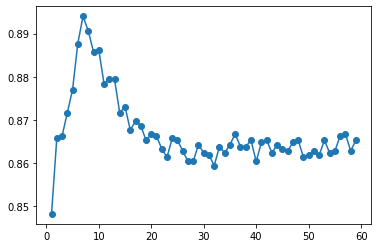

In [ ]:
plt.plot( values, test_score, '-o', label='Test' );

## Publicação do algoritmo em Produção

In [ ]:
# model treinado
model_last = tr.DecisionTreeClassifier( max_depth= 7 )
model_last.fit( np.concatenate( ( X_train, X_test ) ),
                np.concatenate( ( y_train, y_test ) ) )

# Classificação sobre os dados de produção
yhat_prod = model_last.predict( x_prod )
acc_prod = mt.accuracy_score( y_prod, yhat_prod )

print('Acurracy Over Prediction : {:.2f}%'.format( acc_prod*100 ))


Acurracy Over Prediction : 88.95%


# 2.0 Estratégia de Treino-Validação-Test    ( a indicada a se fazer )

In [ ]:
# Separação entre Treino e validação
X_train, X_val, y_train, y_val =  ms.train_test_split( X_train, y_train, test_size=0.2 )

In [ ]:
values = [ i for i in range(1, 60 ) ]

val_score = []
for i in values:
  model = tr.DecisionTreeClassifier( max_depth= i )
  model.fit( X_train, y_train )

  # classificação sobre a validação
  yhat_val = model.predict( X_val )
  acc_val = mt.accuracy_score( y_val, yhat_val )
  val_score.append( acc_val )


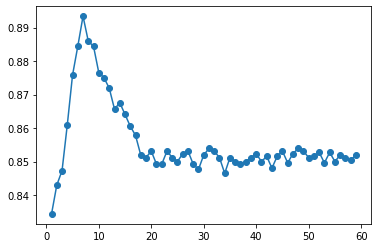

In [ ]:
plt.plot( values, val_score, '-o', label='Validacao' );

In [ ]:
# Previsão sobre os dados de Validação
model = tr.DecisionTreeClassifier( max_depth= 7 )
model.fit( X_train, y_train )

yhat_val = model.predict( X_val )
acc_val = mt.accuracy_score( y_val, yhat_val )

print('Accuracy Over validation : {:.2f}%'.format( acc_val*100 ) )

Accuracy Over validation : 89.34%


In [ ]:
# Modelo Treinado  sobre Training + validation
model_last = tr.DecisionTreeClassifier( max_depth=7 )
model_last.fit( np.concatenate( (X_train, X_val ) ),
                np.concatenate( (y_train, y_val ) ) )

# clasificação sobre os dados de teste
yhat_test = model_last.predict( X_test )
acc_test - mt.accuracy_score( y_test, yhat_test )

print('Accuracy Over Test : {:.2f}'.format( acc_test*100))

Accuracy Over Test : 84.81


In [ ]:
# clasificação sobre os dados de teste
yhat_prod = model_last.predict( x_prod )
acc_prod = mt.accuracy_score( y_prod, yhat_prod )

print('Accuracy Over Test : {:.2f}'.format( acc_prod*100))

Accuracy Over Test : 88.42
